<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Deep-Learning" data-toc-modified-id="Deep-Learning-1">Deep Learning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-1.0.1">Neural Networks</a></span></li><li><span><a href="#Forward-Propagation" data-toc-modified-id="Forward-Propagation-1.0.2">Forward Propagation</a></span></li></ul></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.1">Gradient Descent</a></span></li><li><span><a href="#Backpropagation" data-toc-modified-id="Backpropagation-1.2">Backpropagation</a></span></li><li><span><a href="#Setting-up-your-Keras-and-TensorFlow-Libararies-in-Jupyter-Notebook/Lab" data-toc-modified-id="Setting-up-your-Keras-and-TensorFlow-Libararies-in-Jupyter-Notebook/Lab-1.3">Setting-up your Keras and TensorFlow Libararies in Jupyter Notebook/Lab</a></span></li><li><span><a href="#Creating-a-Keras-Model" data-toc-modified-id="Creating-a-Keras-Model-1.4">Creating a Keras Model</a></span><ul class="toc-item"><li><span><a href="#Model-Specification" data-toc-modified-id="Model-Specification-1.4.1">Model Specification</a></span></li><li><span><a href="#Compiling-and-fitting-a-model" data-toc-modified-id="Compiling-and-fitting-a-model-1.4.2">Compiling and fitting a model</a></span></li></ul></li><li><span><a href="#Classifiction-Models" data-toc-modified-id="Classifiction-Models-1.5">Classifiction Models</a></span><ul class="toc-item"><li><span><a href="#Using-Your-Model" data-toc-modified-id="Using-Your-Model-1.5.1">Using Your Model</a></span></li></ul></li><li><span><a href="#Model-Optimization" data-toc-modified-id="Model-Optimization-1.6">Model Optimization</a></span></li><li><span><a href="#Model-Validation" data-toc-modified-id="Model-Validation-1.7">Model Validation</a></span><ul class="toc-item"><li><span><a href="#Model-Summary" data-toc-modified-id="Model-Summary-1.7.1">Model Summary</a></span></li><li><span><a href="#Plot-Model-Score-vs-Epochs" data-toc-modified-id="Plot-Model-Score-vs-Epochs-1.7.2">Plot Model Score vs Epochs</a></span></li></ul></li><li><span><a href="#Model-Capacity" data-toc-modified-id="Model-Capacity-1.8">Model Capacity</a></span></li></ul></li></ul></div>

# Deep Learning


### Neural Networks
Deep learning uses especially powerful **neural networks**

NN consists of 3 layers:
1. *Input Layer* which contain the features
2. *Output Layer* which contains the predictive variable (target)
3. *Hidden Layer* which models interaction between features (input) and reflect it to the output layer. The more nodes it contains, the more interactions it can capture, and the more complex the computation is.

<img src= "diagram.png" height="300" width="300">

### Forward Propagation

<img src= "feed-forward.png" height="400" width="400">

As you can see from the diagram above. The outputs of the input layer are multiplied by some weights that we need to predict. Adding the products of the weights with the outputs of the input layer determines the value in the hidden layer. The same procedure occurs with the output layer. Moving from the input to hidden to output layers is called **Forward Propagation**.

In order to capture non-linear behaviors between the features themselves, and the feature with the target variable, an **activation function** is used in the hidden layer. According to the function, the input values are transformed into an output that will go through the output layer. One example of activation function is **Rectified Linear Activation Function (ReLU)** which is defined as follows:

$$ RELU(x)=   \left\{
\begin{array}{ll}
      0 \space & x<0 \\
      x & a>=0\\
\end{array} 
\right.  $$

In python you can define the function as follows:

```python
def relu(input):
    '''Define your relu activation function here'''

    output = max(input, 0)
    
    return(output)
```

In order to have better predictions, the number of hidden layers is increased. The more the layers the better the model, the more complex it is. Deep networks internally build represenatations of patterns in the data. It partially replaces the need for feature engineering. More deeper layers include more sophesticated representations of the data

## Gradient Descent
The target to is minimize the loss function (commonly RMSE). This target can be achieved by moving along the loss function for each set of weight values. The slope of the tangent line to the function decide the direction to move along the curve. Move with steps along the loss function curve and measure the slope each time until the slope is minimized. The weights corresponding to the minimum slope are the ones you choose to optimize the model. In addition, the movements steps must be controlled because moving too slow leads to slow simulations and higher computations, and moving too fast might lead us astray. Therefore, we use the **learning rate** and multiply it by the current slope. Then, subtract the result from the current weights to get the new weights.

## Backpropagation

It propagates from prediction error of the output layer through the hidden layers and back to the input layer. This allows gradient descent to update all weights in neural network (by getting gradient/slope for all weights). You need to use forward propagation before updating the weights using backward propagation. Each time you generate predictions using forward propagation, you update the weights using backward propagation.

The slope for wieght is product of:
1. Node value feeding into that weight
2. Slope of activation function for the node being fed into
3. Slope of loss function w.r.t output node

It is common to calculate slopes on only a subset of the data ('batch'). Then, use a different batch of data to calculate next update until you use all data. This is called **Stochastic Gradient Descent**

-------------

In [2]:
# to ignore some warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# import libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set plotting style to 'ggplot'
plt.style.use('ggplot')

## Setting-up your Keras and TensorFlow Libararies in Jupyter Notebook/Lab

1. Create a environment `tf`
> conda create -n tf tensorflow

 > conda activate tf
 
2. In this invironment only tesnorflow is install so you need to install all other libraries such as:
pandas, numpy, scikit-learn, matplotlib, seaborn, keras, ...
> pip install ---

3. Re-install jupyter notebook 
> pip install jupyter notebook

4. Re-install jupyter lab (if you are using it)
> python -m pip install jupyterlab


## Creating a Keras Model

1. Specify model Architecture
2. Compile the model
3. Fit the model
4. Make prediction

### Model Specification

* **`Sequential()`** each layers have nodes connected only the next layer
* **`Dense()`** ALL nodes in previous layers are connected to ALL nodes in current layer

In the next example you'll predict workers wages based on characteristics like their industry, education and level of experience.

In [4]:
df = pd.read_csv('datasets/wages.csv')
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [5]:
predictors = df.drop('wage_per_hour',axis=1).values
target = df['wage_per_hour'].values

In [6]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer (input layer)
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


### Compiling and fitting a model

* Specify the optimizer
    * Control the learning rate
    * "Adam" is usually a good choice
    
    
* Specify the loss function
    * "mean_squared_error" is a common choice for regression
    

* Fitting the model
    * Apply backpropagation and gradient descent with your data to update weights


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors,target)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
534/534 [==============================] - 0s 637us/step - loss: 31.2126


## Classifiction Models

* Loss function is Log Loss: "categorical_crossentropy"
* Add metrics = ['accuracy'] to print accuracy at each epoch which makes it easier for model debugging
* Output Layer does not consist of one node here. It consists of separate node for each posible outcome.
* Change activation function of the output to 'softmax' which ensures predictions sum to 1 so that they can interpreted as probabilities



In the next example we will study the titanic dataset and predict weather a passenger survives or not

First we will convert the target variable to categories and perform one-hot incoding on it by implementing:
```python
from keras.utils import to_categorical
```

In [8]:
df = pd.read_csv('datasets/titanic.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [9]:
# EDA
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [10]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Define the predictors
predictors = df.drop(['survived'],axis=1).as_matrix()

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Save number of columns
n_cols = predictors.shape[1]

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32,activation='relu',input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',
              metrics=['accuracy'])
# 'sgd' stochastic gradient descent

# Fit the model
model.fit(predictors,target)

Epoch 1/1
891/891 [==============================] - 0s 319us/step - loss: 2.1719 - acc: 0.5791


This simple model in 1 epoch got as accuracy of 0.63%

### Using Your Model
You can use your model using:
* Saving (with extension `.h5`)
* Reloading
* Make prediction
* Verfiy its structure

```python
from keras.models import load_model

model.save('model_file.h5')
my_model = load_model('my_model.h5')
predictions = my_model.predict(data_to_predict_with)
probability_true = predictions[:,1]
```


--------------
## Model Optimization

If your model doesn't show much improvement try:
* Changing the learning rate
* Changing the activation function

The next code will show you the effect of having 3 different learning rates from very high to very low.

In [11]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001,0.01,1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Set up the model
    model = Sequential()

    # Add the first layer
    model.add(Dense(32,activation='relu',input_shape=(n_cols,)))

    # Add the output layer
    model.add(Dense(2,activation='softmax'))

    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer,loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target)



Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 0s 349us/step - loss: 3.0684


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 0s 383us/step - loss: 2.2568


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 0s 374us/step - loss: 9.8524


## Model Validation

* You can tell keras to use some of your data as a validation set.
    * **`model.fit(predictors,target,validation_split=0.3)`**
* You can tell keras to stop epochs when the model is not imporving. This is called **Early Stopping**
    * **`EarlyStopping(patience=2)`** stop after 2 epochs of no improvement on the loss function

In [12]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,target,validation_split=0.3,epochs=30,
          callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 978us/step - loss: 0.9984 - acc: 0.6132 - val_loss: 1.4857 - val_acc: 0.6418
Epoch 2/30
623/623 [==============================] - 0s 72us/step - loss: 1.1025 - acc: 0.5618 - val_loss: 0.7832 - val_acc: 0.6866
Epoch 3/30
623/623 [==============================] - 0s 80us/step - loss: 0.7998 - acc: 0.6661 - val_loss: 0.5537 - val_acc: 0.7537
Epoch 4/30
623/623 [==============================] - 0s 70us/step - loss: 0.7193 - acc: 0.6629 - val_loss: 0.5814 - val_acc: 0.6642
Epoch 5/30
623/623 [==============================] - 0s 74us/step - loss: 0.6574 - acc: 0.6565 - val_loss: 0.5511 - val_acc: 0.6940
Epoch 6/30
623/623 [==============================] - 0s 82us/step - loss: 0.6059 - acc: 0.6693 - val_loss: 0.5801 - val_acc: 0.7164
Epoch 7/30
623/623 [==============================] - 0s 83us/step - loss: 0.6551 - acc: 0.6742 - val_loss: 0.5576 - val_acc: 0.7090


Optimizer stopped after 7 epochs

### Model Summary

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 202       
Total params: 11,402
Trainable params: 11,402
Non-trainable params: 0
_________________________________________________________________


### Plot Model Score vs Epochs

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s 61us/step - loss: 0.6200 - acc: 0.7175 - val_loss: 0.5058 - val_acc: 0.7836
Epoch 2/10
623/623 [==============================] - 0s 110us/step - loss: 0.5536 - acc: 0.7592 - val_loss: 0.6877 - val_acc: 0.7052
Epoch 3/10
623/623 [==============================] - 0s 122us/step - loss: 0.5105 - acc: 0.7640 - val_loss: 0.4337 - val_acc: 0.7948
Epoch 4/10
623/623 [==============================] - 0s 66us/step - loss: 0.4894 - acc: 0.7737 - val_loss: 0.4912 - val_acc: 0.7761
Epoch 5/10
623/623 [==============================] - 0s 74us/step - loss: 0.4986 - acc: 0.7849 - val_loss: 0.4177 - val_acc: 0.7948
Epoch 6/10
623/623 [==============================] - 0s 80us/step - loss: 0.4960 - acc: 0.7769 - val_loss: 0.4167 - val_acc: 0.7985
Epoch 7/10
623/623 [==============================] - 0s 82us/step - loss: 0.4856 - acc: 0.7913 - val_loss: 0.6335 - val_acc: 0.7575
Epoch 8/10
623/623 [=

Text(0, 0.5, 'Validation score')

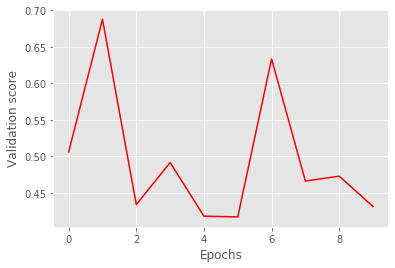

In [20]:
model_tr = model.fit(predictors,target,validation_split=0.3,epochs=10)

plt.plot(model_tr.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')

## Model Capacity

**Model Capacity** is model's ability to capture important features from the data.

**Work flow for optimizing model capacity**:
* Start with a small network
* Get the validation score
* Keep increasing capacity (more layers, nodes, .. etc) until validation score no longer improves





------------------

**Images Example**

In the next example we will work with the MNIST dataset which consists of 28x28 grid images flattened to 784 values for each image. Each image shows a digit. We will create a deep learning model to predicts the digit

In [32]:
df = pd.read_csv('datasets/MNIST.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [46]:
df[0].head()

0    5
1    4
2    3
3    0
4    2
Name: 0, dtype: int64

In [55]:
X = df.drop(0,axis=1).values
y = to_categorical(df[0])

In [56]:
X

array([[0.   , 0.1  , 0.2  , ..., 0.615, 0.616, 0.617],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ...,   nan,   nan,   nan]])

In [57]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape = (784,)))


# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X,y,validation_split=0.3,epochs=30)

Train on 1087 samples, validate on 466 samples
Epoch 1/30
1087/1087 [==============================] - 1s 704us/step - loss: 12.8154 - acc: 0.1803 - val_loss: nan - val_acc: 0.2897
Epoch 2/30
1087/1087 [==============================] - 0s 104us/step - loss: 11.0707 - acc: 0.3027 - val_loss: nan - val_acc: 0.3476
Epoch 3/30
1087/1087 [==============================] - 0s 105us/step - loss: 10.1233 - acc: 0.3643 - val_loss: nan - val_acc: 0.4227
Epoch 4/30
1087/1087 [==============================] - 0s 100us/step - loss: 9.1220 - acc: 0.4241 - val_loss: nan - val_acc: 0.4979
Epoch 5/30
1087/1087 [==============================] - 0s 100us/step - loss: 8.5049 - acc: 0.4664 - val_loss: nan - val_acc: 0.4914
Epoch 6/30
1087/1087 [==============================] - 0s 117us/step - loss: 8.5513 - acc: 0.4637 - val_loss: nan - val_acc: 0.4742
Epoch 7/30
1087/1087 [==============================] - 0s 117us/step - loss: 8.0405 - acc: 0.4922 - val_loss: nan - val_acc: 0.5107
Epoch 8/30
1087/108